# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
propert = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
propert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
propert.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#Осуществил проверку отсутствующих значений
print(propert.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


### Вывод

## Содержится большое количество пробелов

### Шаг 2. Предобработка данных

In [5]:
propert.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Предварительные выводы
 - 1.Количество комнат есть 0 (возможно это не жилое помещение), а так же 19 комнат (какие-то есть очень большие апартаменты)
 - 2.Площадь кухни 12м.кв., а так же 900
 - 3.Потолки 1м, так и 100м
 - 4.Цена указана везде.

## Заполняем пропуски.

### is_apartment

In [6]:
print('Количество NaN в столбце is_apartment:', propert['is_apartment'].isnull().sum())
propert['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Видим, что присутствуют оба значения. Тем не менее, заполнять пропуски значением False не будем, 
т.к. если мы это сделаем, то мы скажем, что во всём датафрейме (>20000 строк) всего 50 апартаментов, что, на мой взгляд, не может соотноситься с реальностью.

### balcony

Где данные по балкону отсутствуют, проставим нули - балкон отсутствует.

In [7]:
propert['balcony'] = propert['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', propert['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


### ceiling_height

In [8]:
print("Высота потолков со значение меньше 2,0 метра:", 
      propert[propert['ceiling_height']<=2.0].count()[0])
print("Высота потолков со значение больше 10,0 метра:", 
      propert[propert['ceiling_height']>=10].count()[0])

Высота потолков со значение меньше 2,0 метра: 14
Высота потолков со значение больше 10,0 метра: 25


Оставим на попозже. Почему?
Согласитесь, что у нас в Питере можно сказать, какой высоты будут потолки, если сказать, где находится квартира. 
Поэтому категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там,
чтоб заполнить пропуски.

### airports_nearest, dtyCenters_nearest:

In [9]:
print('Количество NaN по airports_nearest:', propert['airports_nearest'].isnull().sum())
print('Количество NaN по cityCenters_nearest:', propert['cityCenters_nearest'].isnull().sum())

Количество NaN по airports_nearest: 5542
Количество NaN по cityCenters_nearest: 5519


### locality_name

In [10]:
propert['locality_name'] = propert['locality_name'].str.replace('ё','е') 

In [11]:
print('Пропусков', propert['locality_name'].isnull().sum())

Пропусков 49


In [12]:
propert_name = propert.query('locality_name.isnull()')[['locality_name', 'airports_nearest', 'cityCenters_nearest']]
 
propert_name.head(49)

,locality_name,airports_nearest,cityCenters_nearest
1097,NaN,23478.0,4258.0
2033,NaN,NaN,NaN
2603,NaN,22041.0,17369.0
2632,NaN,22041.0,17369.0
3574,NaN,27419.0,8127.0
4151,NaN,25054.0,3902.0
4189,NaN,21774.0,3039.0
4670,NaN,26534.0,5382.0
5343,NaN,10556.0,9538.0
5707,NaN,21460.0,16788.0


In [13]:
propert[propert['locality_name']=='Санкт-Петербург'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,15721.000000,1.572100e+04,15721.000000,15721.000000,10104.000000,15651.000000,14581.000000,15721.000000,14342.000000,15721.000000,15636.000000,15660.000000,15660.000000,7284.000000,15660.000000,7983.000000,13638.000000
mean,10.180205,8.062507e+06,64.751488,2.171618,2.803709,11.395885,36.959148,6.242033,11.155806,0.581770,28046.186237,11601.291571,0.627586,498.597886,0.770434,520.213955,182.792198
std,5.749004,1.301313e+07,40.417095,1.148098,1.296912,6.372330,24.701374,4.900486,6.543392,0.966853,11557.063820,4842.035279,0.787867,345.181284,0.924568,280.260745,224.719204
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,4.200000e+06,42.000000,1.000000,2.550000,5.000000,19.900000,3.000000,7.200000,0.000000,18584.250000,8327.000000,0.000000,295.000000,0.000000,293.000000,42.000000
50%,10.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,9.900000,0.000000,26757.500000,12244.500000,0.000000,460.000000,1.000000,503.000000,95.000000
75%,14.000000,8.160000e+06,74.600000,3.000000,2.870000,16.000000,44.000000,8.000000,12.500000,1.000000,36614.000000,14943.000000,1.000000,619.000000,1.000000,738.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,112.000000,5.000000,54784.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000


In [14]:
propert.loc[(propert['locality_name'].isnull()) & (propert['cityCenters_nearest'] < 11591), \
            'locality_name'] = propert.loc[(propert['locality_name'].isnull()) \
             & (propert['cityCenters_nearest'] < 11591),'locality_name'].fillna('Санкт-Петербург')

In [15]:
print('Пропусков', propert['locality_name'].isnull().sum())

Пропусков 23


In [16]:
propert_name = propert.query('locality_name.isnull()')[['locality_name', 'airports_nearest', 'cityCenters_nearest']]
propert_name.head(23)

,locality_name,airports_nearest,cityCenters_nearest
2033,NaN,NaN,NaN
2603,NaN,22041.0,17369.0
2632,NaN,22041.0,17369.0
5707,NaN,21460.0,16788.0
6765,NaN,22041.0,17369.0
7600,NaN,37123.0,12332.0
8986,NaN,19659.0,31813.0
12879,NaN,37123.0,12332.0
13223,NaN,22041.0,17369.0
13690,NaN,20234.0,23659.0


In [17]:
#propert[propert['cityCenters_nearest'] == 17369.0].head() 
#тоже Питер
#propert[propert['cityCenters_nearest'] == 16788.0].head()
#тоже Питер
#propert[propert['cityCenters_nearest'] == 12332.0].head() 
#тоже Питер

#propert[propert['cityCenters_nearest'] == 23659.0].head()
#не понятно
#propert[propert['cityCenters_nearest'] == 31897.0].head() 
#не понятно
#propert[propert['cityCenters_nearest'] == 41294.0].head()
#не понятно

Ограничили значение Санкт-Петербург расстоянием 17500 (или 17,5 км) с помощью проверки в ручную

In [18]:
propert.loc[(propert['locality_name'].isnull()) & (propert['cityCenters_nearest'] < 17500), \
            'locality_name'] = propert.loc[(propert['locality_name'].isnull()) \
             & (propert['cityCenters_nearest'] < 17500),'locality_name'].fillna('Санкт-Петербург')

In [19]:
print('Пропусков', propert['locality_name'].isnull().sum())

Пропусков 12


Удалим 12 значений. Это очень малая часть от всего датасета, поэтому можно и удалить. Определить мы их не сможем.

In [20]:
propert = propert.dropna(subset= ['locality_name'])

In [21]:
print('Пропусков', propert['locality_name'].isnull().sum())

Пропусков 0


In [22]:
propert['locality_name'].value_counts()

Санкт-Петербург               15758
поселок Мурино                  556
поселок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
коттеджный поселок Счастье        1
деревня Иссад                     1
поселок Мыза-Ивановка             1
поселок Дружноселье               1
деревня Тихковицы                 1
Name: locality_name, Length: 330, dtype: int64

### cityCenters_nearest

In [23]:
propert['cityCenters_nearest'].describe()

count    18176.000000
mean     14187.322183
std       8604.703653
min        181.000000
25%       9237.000000
50%      13095.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [24]:
print('Пропусков', propert['cityCenters_nearest'].isnull().sum())

Пропусков 5511


In [25]:
propert.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [26]:
cityCenters_nearest_mean = round(propert.groupby('locality_name')\
                                 ['cityCenters_nearest'].mean().sort_values(ascending=False))
print(cityCenters_nearest_mean)

locality_name
поселок Молодежное      65529.0
Зеленогорск             54618.0
Ломоносов               50740.0
Кронштадт               49196.0
поселок Репино          43392.0
                         ...   
село Путилово               NaN
село Рождествено            NaN
село Русско-Высоцкое        NaN
село Старая Ладога          NaN
село Шум                    NaN
Name: cityCenters_nearest, Length: 330, dtype: float64


In [27]:
propert_cityCenter = propert.loc[propert['cityCenters_nearest']\
                                 .isnull()][['cityCenters_nearest', 'locality_name']]
propert_cityCenter['locality_name'].value_counts()

поселок Мурино             554
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
                          ... 
деревня Большое Рейзино      1
поселок Высокоключевой       1
деревня Мануйлово            1
деревня Снегиревка           1
поселок Жилпоселок           1
Name: locality_name, Length: 312, dtype: int64

In [28]:
for loc_name in cityCenters_nearest_mean.index:
    mean = cityCenters_nearest_mean[loc_name]
    propert.loc[propert['locality_name'] == loc_name, 'cityCenters_nearest']\
    = propert.loc[propert['locality_name'] == loc_name, 'cityCenters_nearest'].fillna(mean)

In [29]:
print('Пропусков', propert['cityCenters_nearest'].isnull().sum())

Пропусков 4864


In [30]:
#Вариант 2, тут мы в первой строке проверяем пустое ли поле cityCenters_nearest и если True, то возвращаем среднее, а если False, то исходной значение
def replace_to_mean(row):
    if np.isnan(row['cityCenters_nearest']):
        return cityCenters_nearest_mean[row['locality_name']]
    return row['cityCenters_nearest']

In [31]:
#propert['cityCenters_nearest'] = propert.apply(replace_to_mean, axis=1)

При подтановки среднего значения выдается ошибка, для подстановки нет населенных пунктов для равнения
заполняем остальные пропуски значением средним значением между крайней точкой Санкт-Петербурга (17500) и крайними из нашего списка. Данное значение будет примерно 40000.

In [32]:
#propert['cityCenters_nearest'] = propert['cityCenters_nearest'].fillna(40000)

In [33]:
print('Пропусков', propert['cityCenters_nearest'].isnull().sum())

Пропусков 4864


In [34]:
propert['cityCenters_nearest'].describe()

count    18823.000000
mean     14438.170961
std       8595.079873
min        181.000000
25%       9473.000000
50%      13263.000000
75%      16733.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

### airports_nearest

In [35]:
propert['airports_nearest'].describe()

count    18153.000000
mean     28793.415634
std      12629.601541
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [36]:
print('Пропусков', propert['airports_nearest'].isnull().sum())

Пропусков 5534


In [37]:
airports_nearest_mean = round(propert.groupby('locality_name')\
                                 ['airports_nearest'].mean().sort_values(ascending=False))
print(airports_nearest_mean)

locality_name
поселок Молодежное      84430.0
Зеленогорск             73300.0
Кронштадт               67469.0
поселок Репино          62293.0
поселок Щеглово         61908.0
                         ...   
село Путилово               NaN
село Рождествено            NaN
село Русско-Высоцкое        NaN
село Старая Ладога          NaN
село Шум                    NaN
Name: airports_nearest, Length: 330, dtype: float64


In [38]:
airports_nearest = propert.loc[propert['airports_nearest']\
                                 .isnull()][['airports_nearest', 'locality_name']]
airports_nearest['locality_name'].value_counts()

поселок Мурино                           554
Всеволожск                               398
Гатчина                                  307
деревня Кудрово                          299
Выборг                                   237
                                        ... 
поселок городского типа Большая Ижора      1
деревня Пчева                              1
поселок Жилпоселок                         1
село Никольское                            1
садовое товарищество Садко                 1
Name: locality_name, Length: 311, dtype: int64

In [39]:
for loc_name in airports_nearest_mean.index:
    mean = airports_nearest_mean[loc_name]
    propert.loc[propert['locality_name'] == loc_name, 'airports_nearest']\
    = propert.loc[propert['locality_name'] == loc_name, 'airports_nearest'].fillna(mean)

In [40]:
print('Пропусков', propert['airports_nearest'].isnull().sum())

Пропусков 4864


In [41]:
#propert['airports_nearest'] = propert['airports_nearest'].fillna(60000)

In [42]:
print('Пропусков', propert['airports_nearest'].isnull().sum())

Пропусков 4864


### ceiling_height

In [43]:
print('Пропусков', propert['ceiling_height'].isnull().sum())

Пропусков 9186


Категоризируем все строки по удаленности от центра и возьмем среднее по высоте потолков,
чтоб заполнить пропуски

In [44]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 3000:
        return 'самый центр'
    elif 3000 <= row['cityCenters_nearest'] < 6000:
        return 'центр'
    elif 6000 <= row['cityCenters_nearest'] < 17500:
        return 'предел города'
    elif 17500 <= row['cityCenters_nearest'] < 30000:
        return 'район'
    elif row['cityCenters_nearest'] >= 30000:
        return 'область'

In [45]:
propert['from_height'] = propert.apply(fillna_ceiling_height, axis=1)

In [46]:
#propert[['locality_name', 'cityCenters_nearest', 'from_height']]

In [47]:
#Заполним пропуски средним значением
propert.groupby('from_height')['ceiling_height'].mean().sort_values(ascending = False)

from_height
самый центр      3.233929
центр            3.139725
предел города    2.723815
район            2.719170
область          2.678654
Name: ceiling_height, dtype: float64

In [48]:
list_from_height =['самый центр', 'центр', 'предел города', 'район', 'область']
for column in list_from_height:
    value_from_height = propert.groupby('from_height')['ceiling_height'].mean().get(key = column)
    propert['ceiling_height'] = propert.groupby('from_height')['ceiling_height']\
    .apply(lambda x: x.fillna(x.mean()))    

In [49]:
print('Пропусков', propert['ceiling_height'].isnull().sum())

Пропусков 4864


In [50]:
propert['ceiling_height'].describe()

count    18823.000000
mean         2.786067
std          1.003417
min          1.000000
25%          2.600000
50%          2.723815
75%          2.780000
max        100.000000
Name: ceiling_height, dtype: float64

### floors_total

In [51]:
#Посмотрим какие этажи указаны в квартирах и их количество
propert_floors = propert.query('floors_total.isnull()')[['floors_total', 'rooms', 'floor', 'last_price']]
propert_floors['floor'].value_counts()

4     9
6     9
8     8
12    6
9     5
3     4
21    4
5     4
7     4
11    3
10    3
1     3
13    3
15    3
18    3
19    3
14    2
20    2
2     2
24    2
23    1
17    1
22    1
Name: floor, dtype: int64

In [52]:
#Видно, что этажность квартир разная и привести просто к одному знаменателю нельзя. 
#Сгруппируем по количеству этажей и распределим между домами с этажностью 36, 25, 18, 12. 
#Напишем под это функцию:
 
def fillna_floors_total(row):
    if row['floor'] > 25:
        return '36 этаж'
    elif 18 < row['floor'] <= 25:
        return '25 этаж'
    elif 12 < row['floor'] <= 18:
        return '18 этаж'
    elif row['floor'] <= 12:
        return '12 этаж'

In [53]:
#Применим её:
propert['floors_category'] = propert.apply(fillna_floors_total, axis=1)

In [54]:
#Смотрим результат:
propert[['floors_total', 'floor', 'floors_category']].head(10)

,floors_total,floor,floors_category
0,16.0,8,12 этаж
1,11.0,1,12 этаж
2,5.0,4,12 этаж
3,14.0,9,12 этаж
4,14.0,13,18 этаж
5,12.0,5,12 этаж
6,26.0,6,12 этаж
7,24.0,22,25 этаж
8,27.0,26,36 этаж
9,9.0,7,12 этаж


In [55]:
#Заполним пропуски в столбце floors_total средним по каждой группе floors_category
floors_mean = round(propert.groupby('floors_category')['floors_total'].mean().sort_values(ascending=False).to_frame())
print(floors_mean)

                 floors_total
floors_category              
36 этаж                  29.0
25 этаж                  24.0
18 этаж                  20.0
12 этаж                   9.0


In [56]:
#Переведем NaN в 0
propert['floors_total'] = propert['floors_total'].fillna(0)
 
for floor_to in floors_mean.index:
      propert.loc[propert['floors_category'] == floor_to,'floors_total'] = propert.loc[propert['floors_category'] == floor_to,'floors_total'].replace(0, floors_mean.loc[floor_to, 'floors_total'].astype('int'))

propert['floors_total'].value_counts()

5.0     5787
9.0     3818
16.0    1375
12.0    1362
4.0     1196
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      667
7.0      592
14.0     553
18.0     505
24.0     482
8.0      390
2.0      382
15.0     365
23.0     352
19.0     339
22.0     286
20.0     283
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [57]:
#Заменим максимальные данные по количеству этажей, на 36. т.к в СП самый высокий жилой дом имеет столько этажей.
propert['floors_total'] = propert['floors_total'].replace(60, 36)
propert['floors_total'] = propert['floors_total'].replace(52, 36)
propert['floors_total'] = propert['floors_total'].replace(37, 36)

In [58]:
#Проверим данные на предмет замены:
propert['floors_total'].describe()

count    23687.000000
mean        10.681935
std          6.587590
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [59]:
print('Пропусков', propert['floors_total'].isnull().sum())

Пропусков 0


In [60]:
propert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23687 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23687 non-null int64
last_price              23687 non-null float64
total_area              23687 non-null float64
first_day_exposition    23687 non-null object
rooms                   23687 non-null int64
ceiling_height          18823 non-null float64
floors_total            23687 non-null float64
living_area             21787 non-null float64
floor                   23687 non-null int64
is_apartment            2769 non-null object
studio                  23687 non-null bool
open_plan               23687 non-null bool
kitchen_area            21412 non-null float64
balcony                 23687 non-null float64
locality_name           23687 non-null object
airports_nearest        18823 non-null float64
cityCenters_nearest     18823 non-null float64
parks_around3000        18177 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### kitchen_area

In [61]:
print('Пропусков', propert['kitchen_area'].isnull().sum())
print('Пропусков', propert['living_area'].isnull().sum())

Пропусков 2275
Пропусков 1900


Данные важны эти важны, но устанавливать среднее значение было б не корректно.
Могет быть недвижимость, где по сути кухня является одновременно и жилой площадью. Например, студии.

In [62]:
propert.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64

Лишь малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать, не делить же пополам общую площадь. Оставим как есть


### living_area

In [63]:
propert_living = propert.query('living_area.isnull()')\
[['total_area', 'living_area', 'rooms', 'last_price']]

In [64]:
propert_living.head()

,total_area,living_area,rooms,last_price
3,159.0,NaN,3,64900000.0
7,71.6,NaN,2,7915000.0
30,32.8,NaN,1,2200000.0
37,45.8,NaN,2,1990000.0
44,40.0,NaN,1,5350000.0


In [65]:
propert['living_area'].describe()

count    21787.000000
mean        34.456412
std         22.032961
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [66]:
#Посмотрим, в каких квартирах нет значений и сколько их.
propert_living['rooms'].value_counts()

1    658
2    643
3    447
4     91
5     34
0     14
7      6
6      6
9      1
Name: rooms, dtype: int64

In [67]:
propert['area_ratio_living'] = propert['living_area'] / propert['total_area']

In [68]:
round(propert.groupby(['rooms']).agg({'area_ratio_living' : 'mean'}),2)

,area_ratio_living
rooms,
0,0.69
1,0.49
2,0.58
3,0.63
4,0.65
5,0.64
6,0.67
7,0.66
8,0.67


Видно, что количество комнат в квартирах разная и привести просто к одному знаменателю нельзя. 
Сгруппируем по коэффициентам и распределим между домами с количеством комнат от 0 до 19. 
Напишем под это функцию:

In [69]:
def fillna_living_area(row):
    if row['rooms'] == 0:
        return 0.69
    elif row['rooms'] == 1:
        return 0.49
    elif row['rooms'] == 2:
        return 0.58
    elif row['rooms'] == 3:
        return 0.63
    elif row['rooms'] == 4:
        return 0.65
    elif row['rooms'] == 5:
        return 0.64
    elif row['rooms'] == 6:
        return 0.67
    elif row['rooms'] == 7:
        return 0.66
    elif row['rooms'] == 9:
        return 0.61

In [70]:
propert['living_area_category'] = propert.apply(fillna_living_area, axis=1)

In [71]:
propert['living_area_category']

0        0.63
1        0.49
2        0.58
3        0.63
4        0.58
         ... 
23694    0.63
23695    0.63
23696    0.58
23697    0.58
23698    0.49
Name: living_area_category, Length: 23687, dtype: float64

In [72]:
living_area_mean = round(propert.groupby('living_area_category')['living_area']\
                         .mean().sort_values(ascending=False).to_frame())
print(living_area_mean)

                      living_area
living_area_category             
0.61                        190.0
0.66                        164.0
0.67                        131.0
0.64                        100.0
0.65                         67.0
0.63                         47.0
0.58                         32.0
0.69                         19.0
0.49                         18.0


In [73]:
#Переведем NaN в 0
propert['living_area'] = propert['living_area'].fillna(0)
 
for living_to in living_area_mean.index:
      propert.loc[propert['living_area_category'] == living_to,'living_area']\
        = propert.loc[propert['living_area_category'] == living_to,'living_area']\
        .replace(0, living_area_mean.loc[living_to, 'living_area'].astype('int'))

propert['living_area'].value_counts()

18.00    1540
32.00     963
17.00     675
30.00     598
47.00     584
         ... 
20.03       1
10.55       1
24.83       1
20.97       1
15.55       1
Name: living_area, Length: 1783, dtype: int64

In [74]:
print('Пропусков', propert['living_area'].isnull().sum())

Пропусков 0


### Вернемся к заполнению kitchen_area

In [75]:
propert_kitchen_area_categ = (propert['kitchen_area'] / propert['total_area']).groupby(propert['rooms']).mean()

In [76]:
propert.loc[propert['kitchen_area'].isnull(), 'kitchen_area'] = propert.loc[propert['kitchen_area'].isnull(), 'rooms'].apply(lambda x: x * propert_kitchen_area_categ[x])

In [77]:
print('Пропусков', propert['kitchen_area'].isnull().sum())

Пропусков 197


Оставим данные пропуски без заполнения

In [78]:
propert.duplicated().sum()

0

Получалось ноль, бубликатов похоже нет

### Шаг 3. Посчитайте и добавьте в таблицу

In [79]:
propert['first_day_exposition'].describe()

count                   23687
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [80]:
propert['first_day_exposition'] = pd.to_datetime(propert['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [81]:
propert['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Добавим год, месяц и день недели публикации объявления

In [82]:
propert['year'] = propert['first_day_exposition'].apply(lambda x: x.year)
propert['month'] = propert['first_day_exposition'].apply(lambda x: x.month)
propert['day'] = propert['first_day_exposition'].dt.weekday
propert[['year', 'month', 'day']].head(10)

,year,month,day
0,2019,3,3
1,2018,12,1
2,2015,8,3
3,2015,7,4
4,2018,6,1
5,2018,9,0
6,2017,11,3
7,2019,4,3
8,2018,5,2
9,2017,2,6


День недели получился в формате числа (0 - понедельник, 6 - воскресенье), будем его менять:

In [83]:
dict_of_weekdays = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 
                    4: 'пятница', 5: 'суббота', 6: 'воскресенье'}

In [84]:
propert['day'] = propert['day'].map(dict_of_weekdays)

In [85]:
propert[['first_day_exposition', 'year', 'month', 'day']].head(10)

,first_day_exposition,year,month,day
0,2019-03-07,2019,3,четверг
1,2018-12-04,2018,12,вторник
2,2015-08-20,2015,8,четверг
3,2015-07-24,2015,7,пятница
4,2018-06-19,2018,6,вторник
5,2018-09-10,2018,9,понедельник
6,2017-11-02,2017,11,четверг
7,2019-04-18,2019,4,четверг
8,2018-05-23,2018,5,среда
9,2017-02-26,2017,2,воскресенье


Изменим категории по этажам на 'первый этаж', 'последний этаж', 'другие этажи' и 'последние этажи':

In [86]:
def floors(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    return 'другие этажи'

In [87]:
#Применим её:
propert['floors_category'] = propert.apply(floors, axis=1)

In [88]:
#Смотрим результат:
propert[['floors_total', 'floor', 'floors_category']].head(20)

,floors_total,floor,floors_category
0,16.0,8,другие этажи
1,11.0,1,первый этаж
2,5.0,4,другие этажи
3,14.0,9,другие этажи
4,14.0,13,другие этажи
5,12.0,5,другие этажи
6,26.0,6,другие этажи
7,24.0,22,другие этажи
8,27.0,26,другие этажи
9,9.0,7,другие этажи


In [89]:
propert['price_of_m2'] = propert['last_price']/propert['total_area']
propert['living_part'] = propert['living_area']/propert['total_area']
propert['kitchen_part'] = propert['kitchen_area']/propert['total_area']

Займемся изменением типов данных для следующих столбцов данных

In [90]:
#Список столбцов для приведения к типу int приведен в словаре list_int:
list_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', \
            'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',\
            'days_exposition', 'price_of_m2']
for column in list_int:
    propert[column] = propert[propert[column].notnull()][column].astype('int')

Столбцы округления данных

In [91]:
list_znak2 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'living_part'\
              , 'kitchen_part']
for column in list_znak2:
    propert[column] = propert[propert[column].notnull()][column].round(2)

Посмотрим, что получилось

In [92]:
propert.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,from_height,floors_category,area_ratio_living,living_area_category,year,month,day,price_of_m2,living_part,kitchen_part
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,предел города,другие этажи,0.472222,0.63,2019,3,четверг,120370,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.72,11,18.60,1,NaN,...,район,первый этаж,0.460396,0.49,2018,12,вторник,82920,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.72,5,34.30,4,NaN,...,предел города,другие этажи,0.612500,0.58,2015,8,четверг,92785,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.72,14,47.00,9,NaN,...,предел города,другие этажи,NaN,0.63,2015,7,пятница,408176,0.30,0.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,предел города,другие этажи,0.320000,0.58,2018,6,вторник,100000,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,None,другие этажи,0.473684,0.49,2018,9,понедельник,95065,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.72,26,10.60,6,NaN,...,район,другие этажи,0.284182,0.49,2017,11,четверг,99195,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.72,24,32.00,22,NaN,...,предел города,другие этажи,NaN,0.58,2019,4,четверг,110544,0.45,0.26
8,20,2900000,33.16,2018-05-23,1,2.72,27,15.43,26,NaN,...,район,другие этажи,0.465320,0.49,2018,5,среда,87454,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,предел города,другие этажи,0.714754,0.63,2017,2,воскресенье,88524,0.71,0.11


Столбец last_price приведем к ед.изм. в тысячам, а то слишком много нулей. Ну и, соответственно, тоже самое проделаем для price_of_m2.

In [93]:
propert['last_price'] = (propert[propert['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
propert['price_of_m2'] = (propert[propert['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)
propert.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,from_height,floors_category,area_ratio_living,living_area_category,year,month,day,price_of_m2,living_part,kitchen_part
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,предел города,другие этажи,0.472222,0.63,2019,3,четверг,120.370,0.47,0.23
1,7,3350,40.4,2018-12-04,1,2.72,11,18.6,1,NaN,...,район,первый этаж,0.460396,0.49,2018,12,вторник,82.920,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.72,5,34.3,4,NaN,...,предел города,другие этажи,0.612500,0.58,2015,8,четверг,92.785,0.61,0.15
3,0,64900,159.0,2015-07-24,3,2.72,14,47.0,9,NaN,...,предел города,другие этажи,NaN,0.63,2015,7,пятница,408.176,0.30,0.00
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,предел города,другие этажи,0.320000,0.58,2018,6,вторник,100.000,0.32,0.41


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 1. Изучение основных параметров недвижимости

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Данные параметры заполнены без пропусков. Все пропуски считаю заполнять не целесообразно.

In [94]:
propert[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23687.000000,23687.000000,23687.000000,18823.000000
mean,60.339692,6542.159581,2.070587,2.785274
std,35.652039,10889.402602,1.078526,1.003452
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.720000
75%,69.800000,6800.000000,3.000000,2.780000
max,900.000000,763000.000000,19.000000,100.000000


- по площади есть как квартира 12 кв.м., так и 900 кв.м. (я раньше вроде это упоминал)))) 
Но ср.значение более верное;
- по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн. Выбор есть на любой вкус.
- число комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения;
- высота потолков - от 1 до 100 метров Хотя среднее значение более здравое.

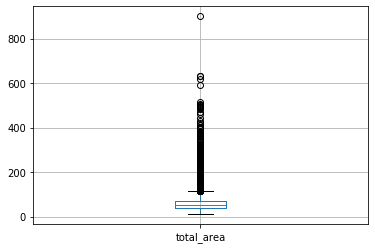

In [95]:
propert.boxplot(['total_area'], fontsize=10)

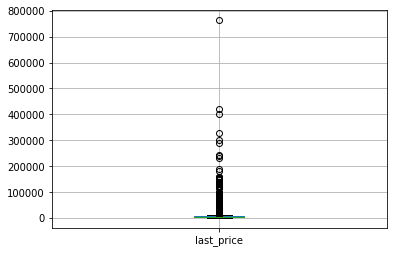

In [96]:
propert.boxplot(['last_price'], fontsize=10)

Начинаем определять выбросы по каждому из набора данных, но они очень не наглядны. Попытаемся их автоматизировать 
с помощью подключения matplotlib.pyplot 

In [97]:
import matplotlib.pyplot as plt

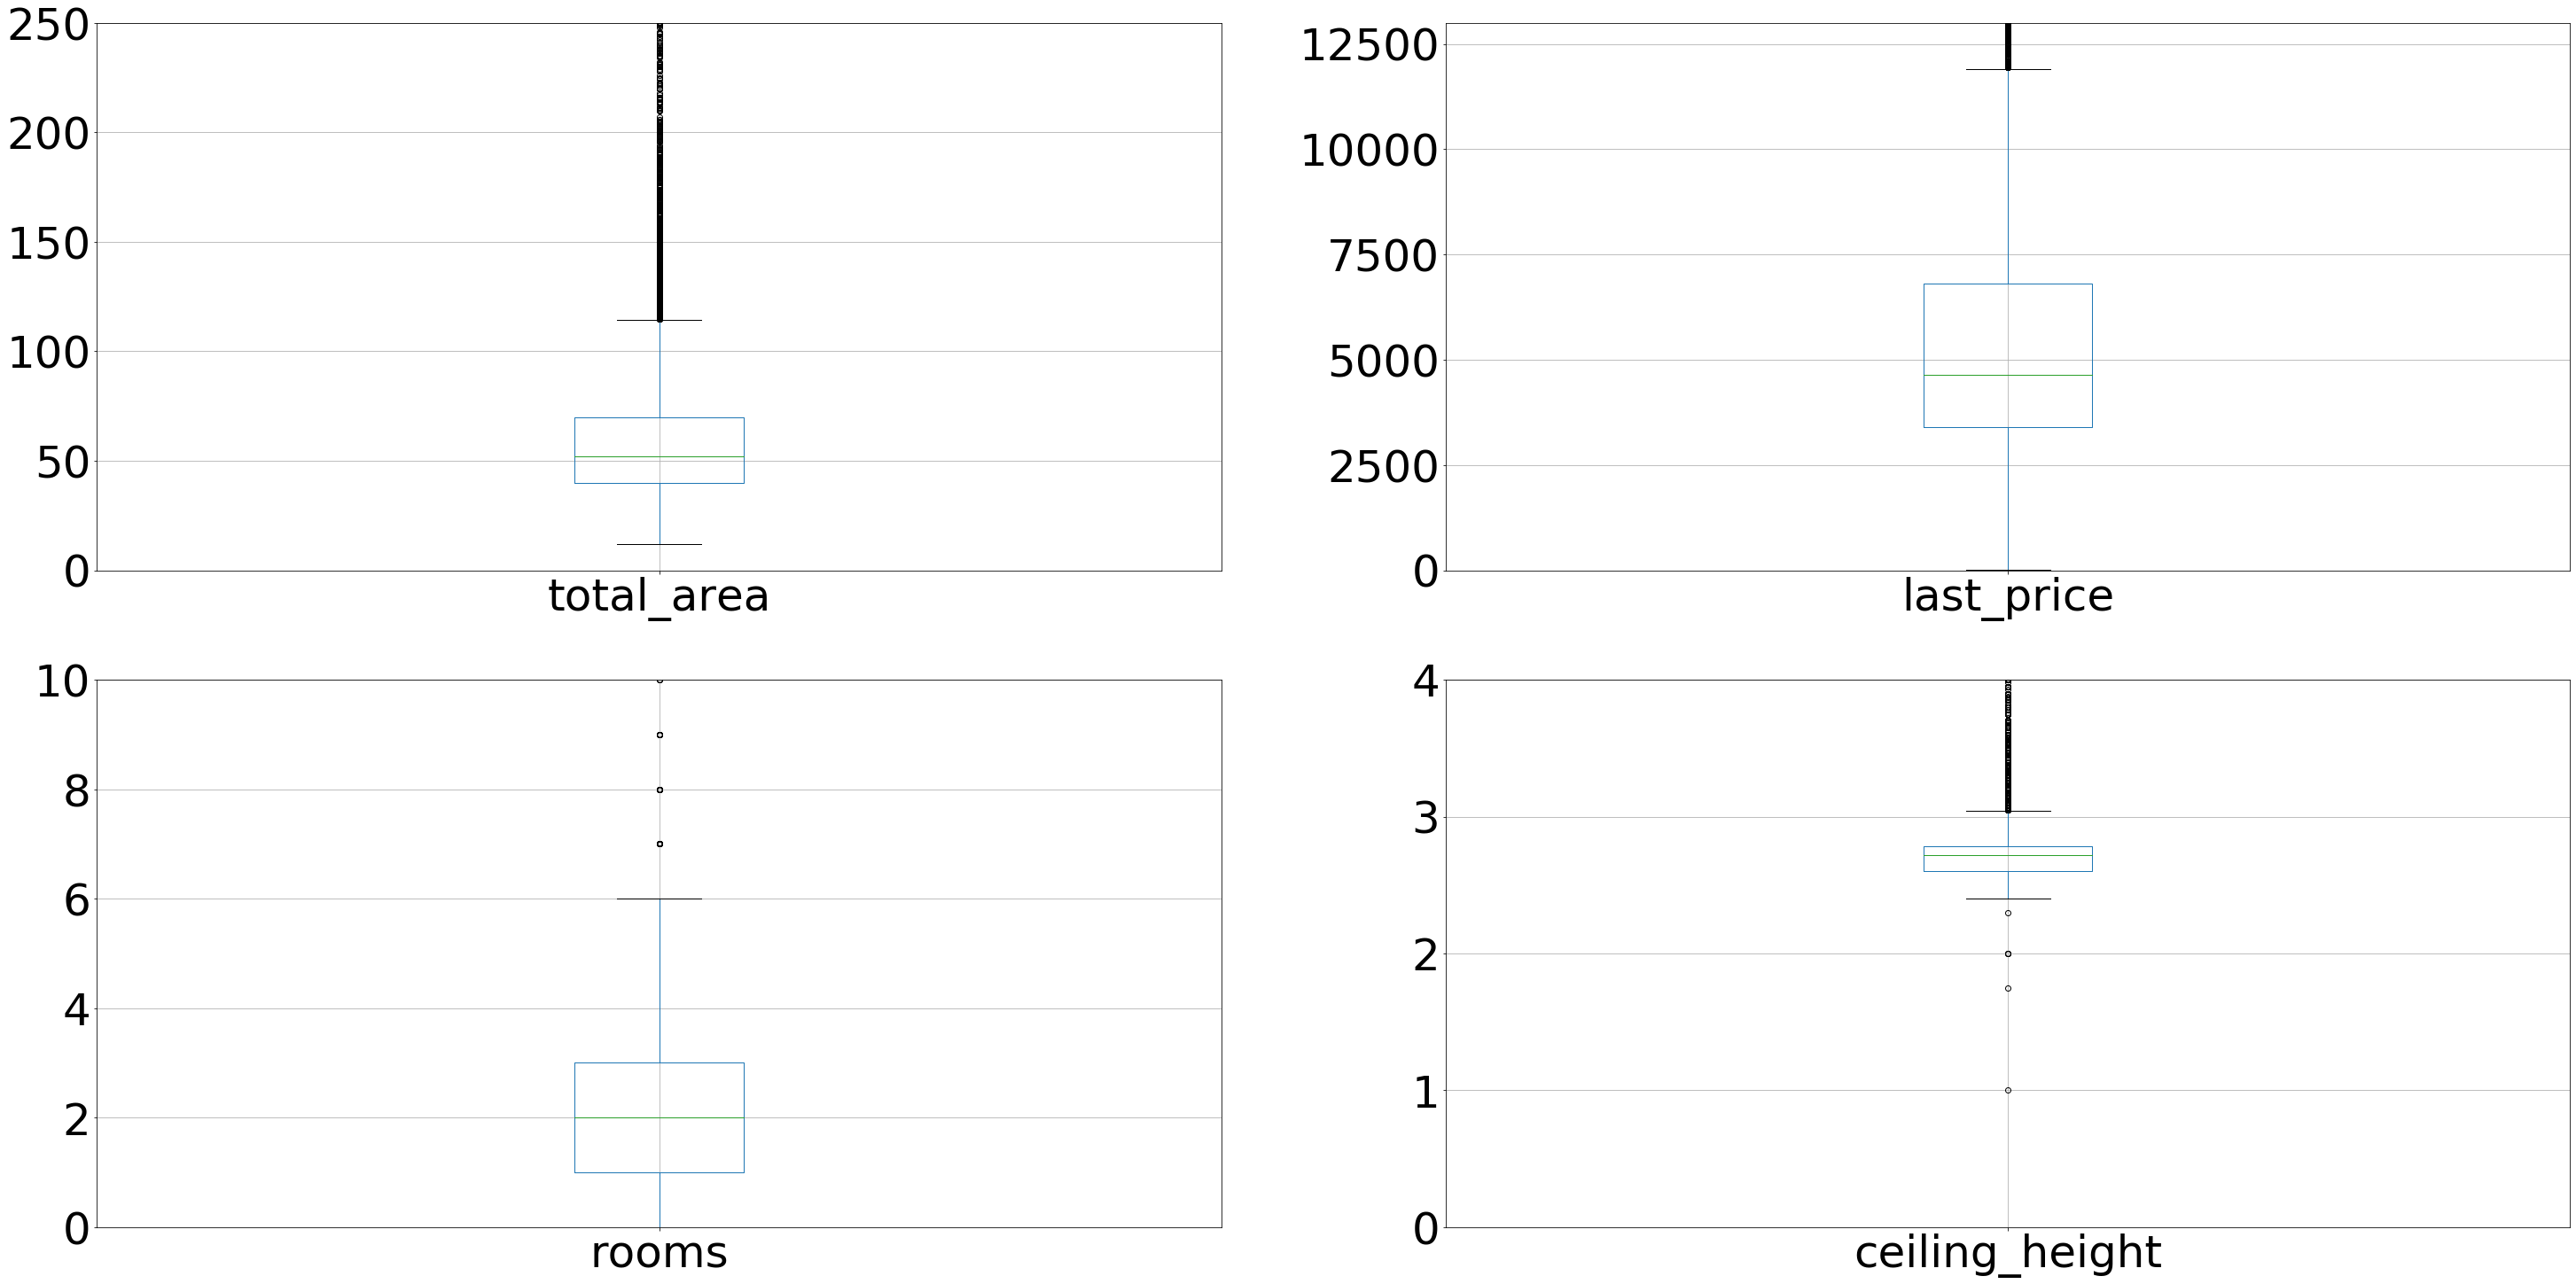

In [98]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [250, 13000, 10, 4]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = propert.boxplot(column=column_list[count], ax=axes[r,c], fontsize=50)
        ax.set_ylim([0, ylims[count]])
        count += 1

Определи выбросы по каждому из параметров данных и определяем границы:
- total_area - 20-130 кв.м.;
- last_price - 0-12 млн р.;
- rooms - 0-6 комнат;
- ceiling_height - 2,3-3,9м

In [99]:
print(propert[['total_area', 'last_price', 'rooms', 'ceiling_height']].isnull().count())

total_area        23687
last_price        23687
rooms             23687
ceiling_height    23687
dtype: int64


Делаем данные чистые (без выбросов)

In [100]:
propert = propert.query("total_area > 20 and total_area < 120")
propert = propert.query("last_price > 0 and last_price < 12000")
propert = propert.query("rooms <= 6")
propert = propert.query("ceiling_height > 2.3 and ceiling_height < 3.9")

In [101]:
print(propert[['total_area', 'last_price', 'rooms', 'ceiling_height']].isnull().count())

total_area        16615
last_price        16615
rooms             16615
ceiling_height    16615
dtype: int64


Когда убрали заполнение растояний определенным значением, то число выбросов соответственно еще больше
увеличилось. Это был не надежный способ заполнить пропуско и резонно было их оставить. 
Мы удалили 7072 выброса.

#### 2. Посмотроение гистограммы по времени продажи квартиры:

In [102]:
propert['days_exposition'].describe().to_frame()

,days_exposition
count,14820.000000
mean,170.811538
std,211.136882
min,1.000000
25%,41.000000
50%,90.000000
75%,215.000000
max,1553.000000


In [103]:
print('Медианное значение продаж', propert['days_exposition'].median(), 'дней')

Медианное значение продаж 90.0 дней


Есть квартиры, которые продавались очень-очень, это как-то не риально. Вполне возможно, что это объявления, которые вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение.
Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3 месяца хороший срое для продажи квартиры.

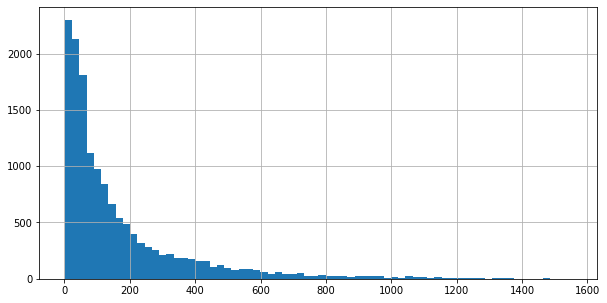

In [104]:
propert['days_exposition'].hist(bins=70, figsize=(10,5))

Большая часть квартир продавалась в течение первых 40-60 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи

Посмотрим на boxplot:

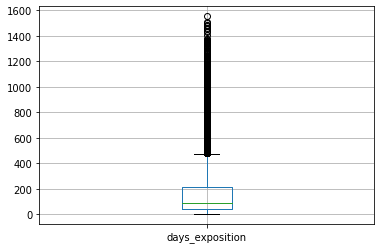

In [105]:
propert.boxplot(column='days_exposition')

Ограничу срок продажи 500 днями, чтоб убрать выбросы и посмотрим.

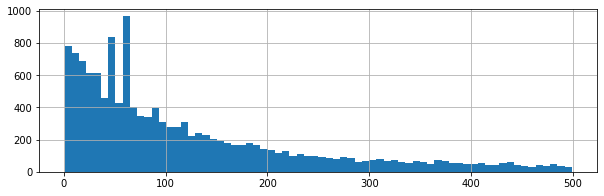

In [106]:
propert.query('days_exposition < 500')['days_exposition'].hist(bins=70, figsize=(10,3))

Посмотрим пики еще подробнее.

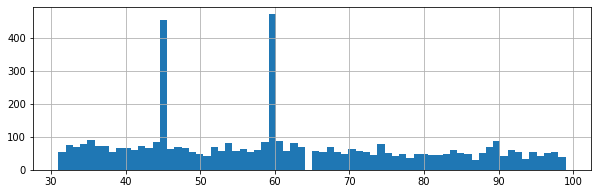

In [107]:
propert.query('30 < days_exposition < 100')['days_exposition'].hist(bins=70, figsize=(10,3))

Это похоже на то, что определенн количество объявлений закрывает не сам клиент. А фильтруется агенство. И интервал проверки примерно 15 дней (2 недели)

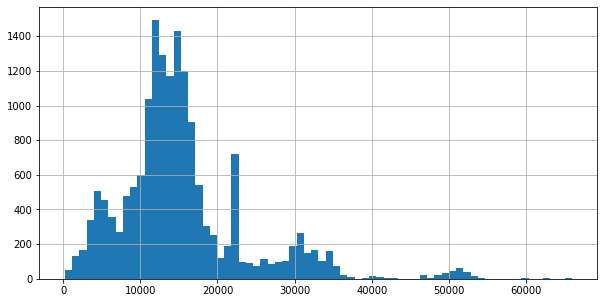

In [108]:
propert['cityCenters_nearest'].hist(bins=70, figsize=(10,5))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3187: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  new_data = self.loc[res]


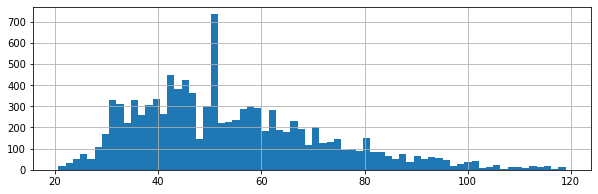

In [109]:
propert.query('cityCenters_nearest')['total_area'].hist(bins=70, figsize=(10,3))

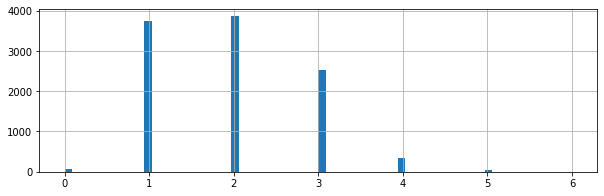

In [110]:
propert.query('cityCenters_nearest')['rooms'].hist(bins=70, figsize=(10,3))

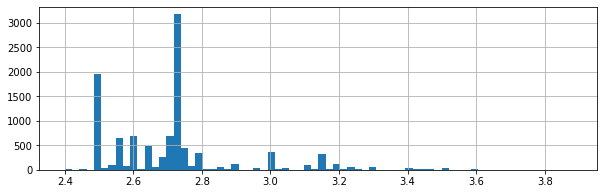

In [111]:
propert.query('cityCenters_nearest')['ceiling_height'].hist(bins=70, figsize=(10,3))

#### 3. Построение общих графиков зависимостей

In [112]:
propert.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,area_ratio_living,living_area_category,year,month,price_of_m2,living_part,kitchen_part
count,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16481.000000,16615.000000,...,15992.000000,7676.000000,14820.000000,15490.000000,16615.000000,16615.000000,16615.000000,16615.000000,16615.000000,16481.000000
mean,9.793379,5390.034788,53.648471,1.930545,2.720219,11.665543,30.653583,6.339693,9.016932,0.589287,...,0.706916,531.247655,170.811538,0.562028,0.561839,2017.368522,6.409810,101.783386,0.562596,0.176307
std,5.568368,2080.413105,18.467535,0.905019,0.194067,6.679828,13.263709,5.109024,4.527195,0.942403,...,0.889116,276.932881,211.136882,0.103964,0.059747,1.022927,3.465236,23.588369,0.107806,0.084651
min,0.000000,12.000000,20.100000,0.000000,2.400000,1.000000,2.000000,1.000000,0.250000,0.000000,...,0.000000,16.000000,1.000000,0.038462,0.490000,2014.000000,1.000000,0.111000,0.040000,0.000000
25%,6.000000,3850.000000,39.300000,1.000000,2.600000,5.000000,18.000000,3.000000,6.500000,0.000000,...,0.000000,315.000000,41.000000,0.493178,0.490000,2017.000000,3.000000,85.700000,0.490000,0.130000
50%,9.000000,4900.000000,50.000000,2.000000,2.720000,9.000000,29.600000,5.000000,8.700000,0.000000,...,0.000000,520.000000,90.000000,0.566391,0.580000,2017.000000,6.000000,99.000000,0.570000,0.170000
75%,14.000000,6500.000000,64.600000,3.000000,2.720000,16.000000,39.610000,9.000000,11.000000,1.000000,...,1.000000,741.000000,215.000000,0.635014,0.630000,2018.000000,10.000000,114.484000,0.640000,0.230000
max,50.000000,11999.000000,119.600000,6.000000,3.880000,36.000000,100.000000,33.000000,64.000000,5.000000,...,3.000000,1344.000000,1553.000000,1.000000,0.690000,2019.000000,12.000000,312.240000,1.490000,0.790000


In [113]:
def depend_price(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 
                  'floors_category': 'Зависимость цены от этажа',
                  'from_height': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам',
                'cityCenters_nearest_piter': 'Зависимость цены от удаленности от центра города'}
    if column == 'floors_category' or column == 'from_height':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'from_height':
        fontsize = 10
    else:
        fontsize = 15
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    return plot

In [114]:
propert.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,from_height,floors_category,area_ratio_living,living_area_category,year,month,day,price_of_m2,living_part,kitchen_part
1,7,3350,40.4,2018-12-04,1,2.72,11,18.6,1,NaN,...,район,первый этаж,0.460396,0.49,2018,12,вторник,82.920,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.72,5,34.3,4,NaN,...,предел города,другие этажи,0.612500,0.58,2015,8,четверг,92.785,0.61,0.15
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,предел города,другие этажи,0.320000,0.58,2018,6,вторник,100.000,0.32,0.41
6,6,3700,37.3,2017-11-02,1,2.72,26,10.6,6,NaN,...,район,другие этажи,0.284182,0.49,2017,11,четверг,99.195,0.28,0.39
7,5,7915,71.6,2019-04-18,2,2.72,24,32.0,22,NaN,...,предел города,другие этажи,NaN,0.58,2019,4,четверг,110.544,0.45,0.26


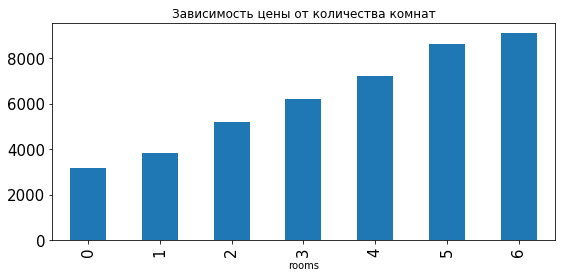

In [115]:
depend_price(propert, 'rooms')

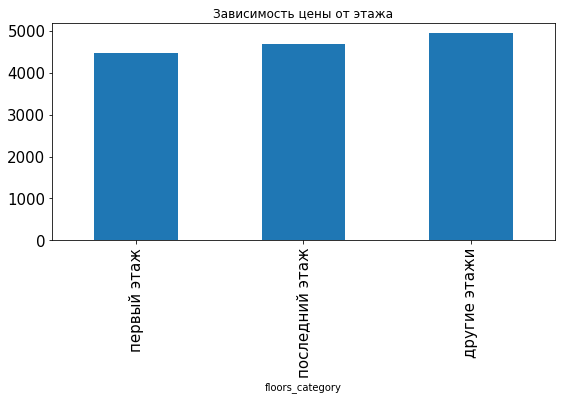

In [116]:
depend_price(propert, 'floors_category')

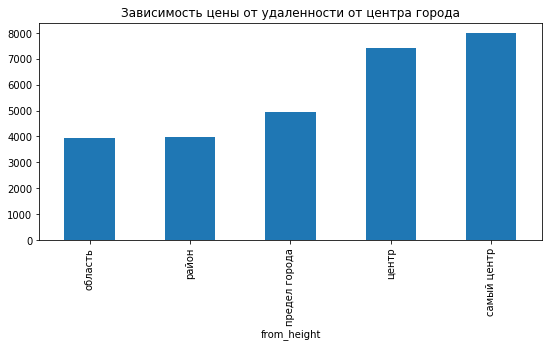

In [117]:
depend_price(propert, 'from_height')

#### 4. Построение графиков временной зависимости средней цены от дня недели, месяца и года

In [118]:
def data_price(df):
    data_plot = ['day', 'month', 'year']
    titles = ['Медиана цен от дня недели', 'Медиана цен от месяца', 'Медиана цен от года']
    for i in range(len(data_plot)):
        df_to_plot = propert.groupby(data_plot[i]).median()['last_price'].reset_index().sort_values(by=data_plot[i])
        plot = df_to_plot.plot(x=data_plot[i], y="last_price", kind='bar', figsize=(10,5),legend=False, title=titles[i], fontsize=15)
    return plot

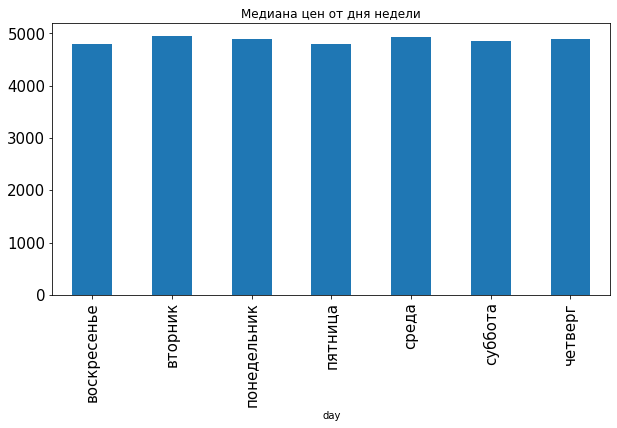

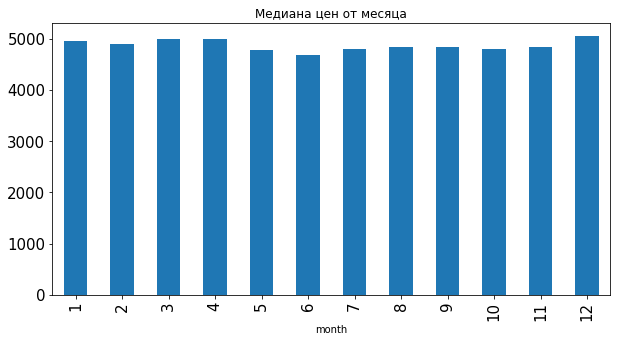

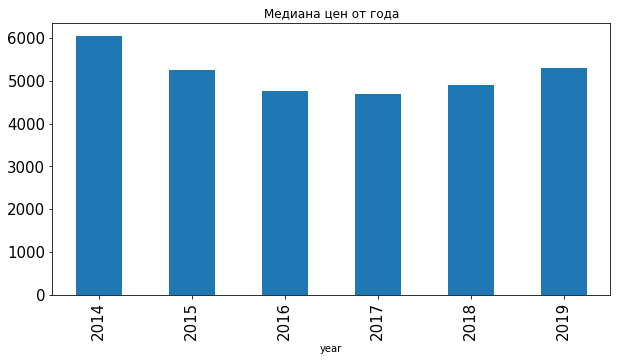

In [119]:
data_price(propert)

Теперь можно и обсудить:
- зависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена, опубликованных в выходные дни;
- зависимость цены от месяца публикации - апрель, сентябрь, ноябрь и декабрь оказались самыми высокими по стоимости недвижимости. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами;
- зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и проидемся в разрезе год/месяц:

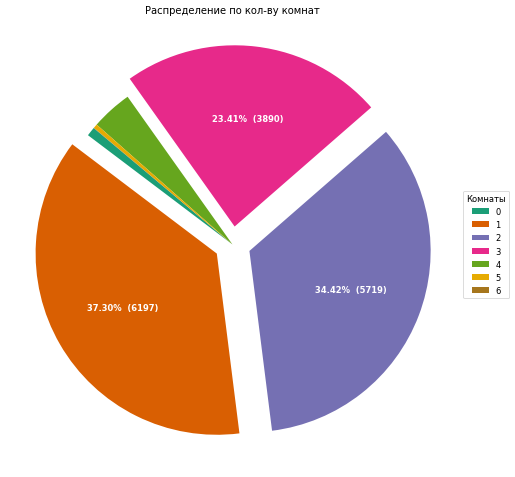

In [120]:
#создаем сводную таблицу для создания круговой диаграммы
rooms_pivot = propert.pivot_table(index='rooms', values='last_price', aggfunc='count')
 
fig, ax = plt.subplots(figsize=(20,10), dpi= 60)
 
data = rooms_pivot
categories = propert['rooms']
explode = ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.']
 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct > 10:
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
 
wedges, texts, autotexts = ax.pie(rooms_pivot['last_price'],
                                  autopct = make_autopct(rooms_pivot['last_price']),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode = [0,.1,.1,.1,0,0,0],
                                  labels=rooms_pivot.index
                                  )
 
# Decoration
ax.legend(wedges, rooms_pivot.index, title="Комнаты", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Распределение по кол-ву комнат")
plt.show()

Круговая диаграмма "Распределение по количеству комнат": 71% квартир имеют 1 или 2 комнаты, 23% - 3 комнаты и небольшое количество - 4. Есть еще квартиры, имеющие больше комнат (или квартиры-студии), но их процент значительно ниже.

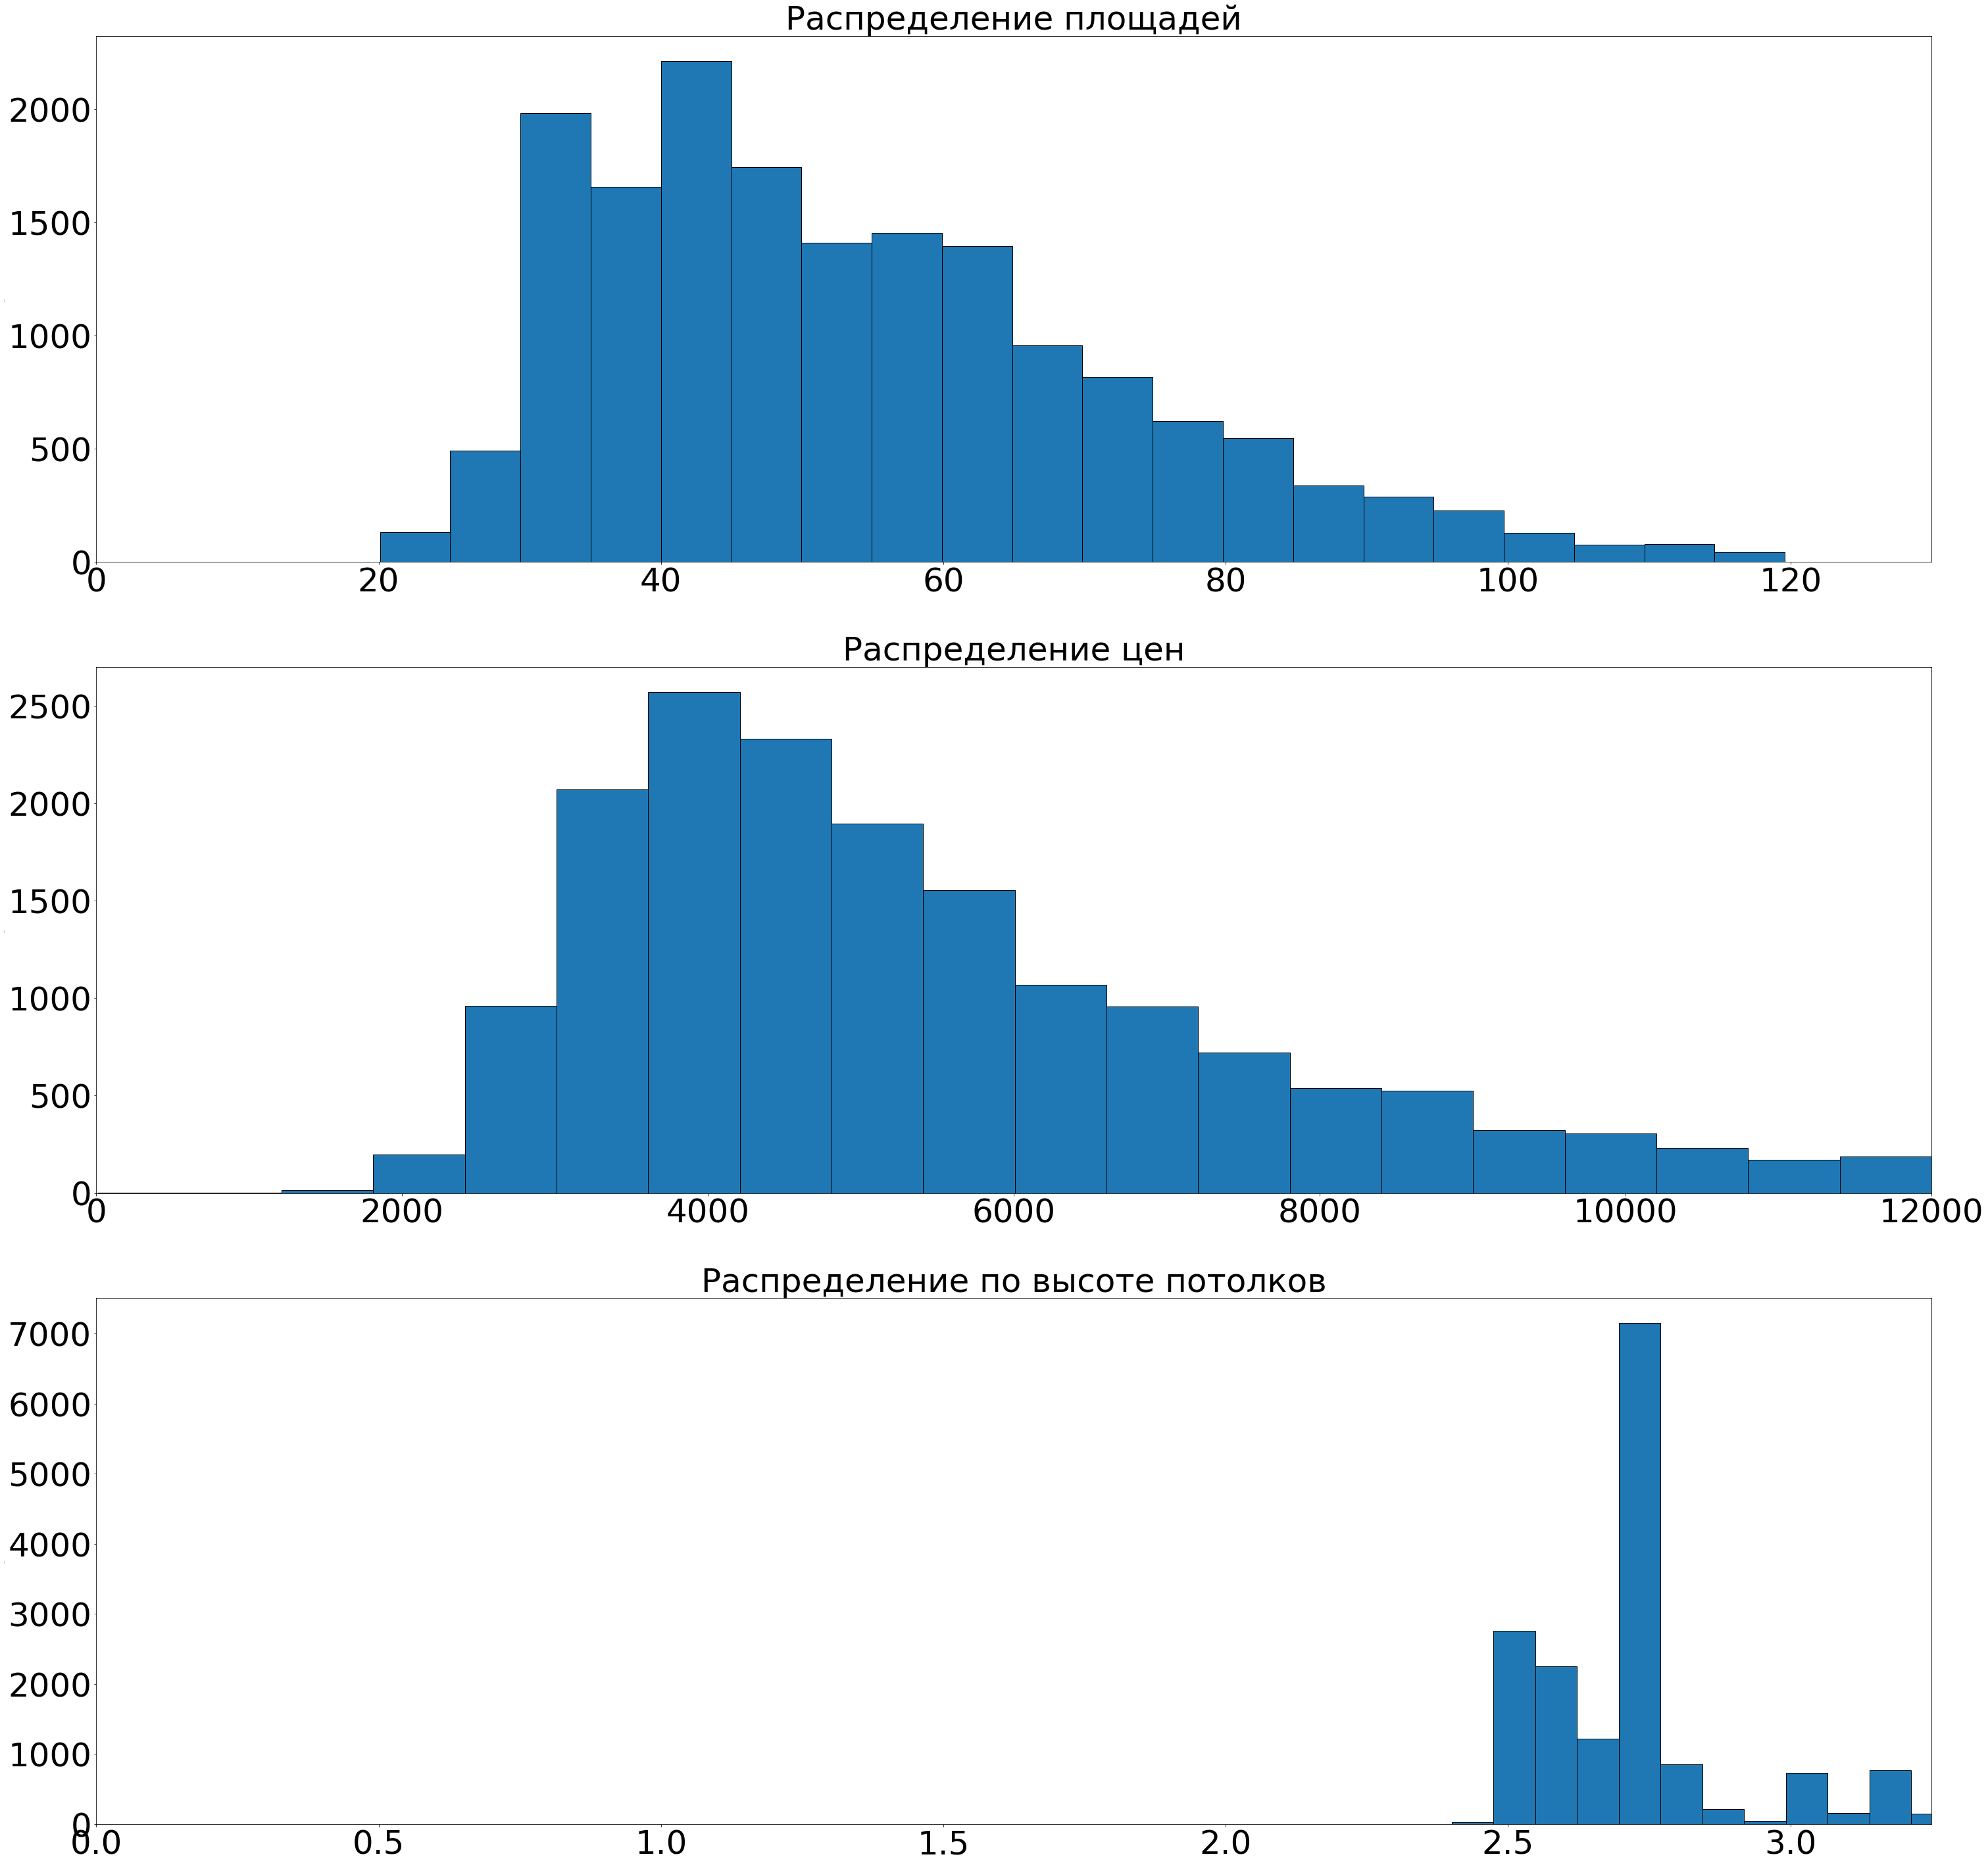

In [121]:
df_list = [propert['total_area'], propert['last_price'], propert['ceiling_height']]
df_titles_list = ['Распределение площадей', 'Распределение цен', 'Распределение по высоте потолков']
xlims_list = [130, 12000, 3.25]
nrow = 3

fig, axes = plt.subplots(nrows=nrow, figsize=(50,50))
count = 0
for r in range(nrow):
    ax = df_list[count].plot(kind='hist', bins=20, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r])
    if count == 3:
        ax.set_xlim(2.4, xlims_list[count])
        ax.title.set_position([0.5, 1.15])
    else:
        ax.set_xlim(0, xlims_list[count])
    ax.title.set_size(50)
    ax.yaxis.label.set_size(0)
    count += 1

- Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 30 до 80 кв.м., максимум приходится на 50 кв.м..

- Гистограмма "Распределение цен": цена на квартиры лежит в промежутке от 2 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3,5 и 6 млн.

- Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки от 2,5-3,5м. Самый популярный вариант - 2,7-2,75м. 

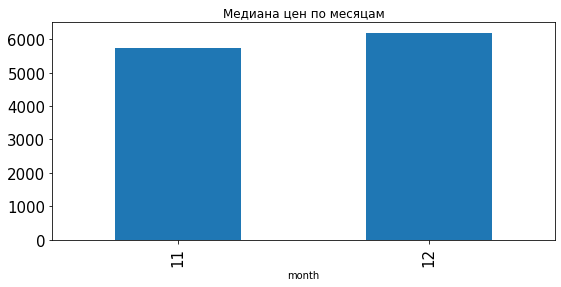

In [122]:
depend_price(propert.query('year == 2014'), 'month')

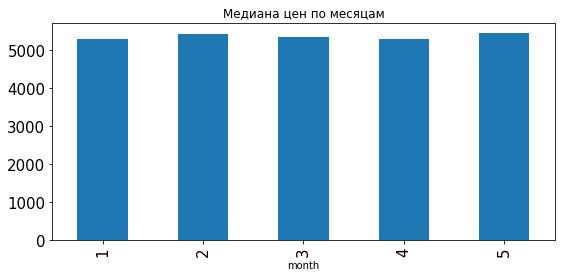

In [123]:
depend_price(propert.query('year == 2019'), 'month')

Видно было ранее что продажи начались регистрироваться с 27/11/2014 по 03/05/2019. 
Предполагаю, что такие высокие цены были вызваны непонятной ситуацией на рынке недвижимости (ослаблением российского рубля). По сути спрос превышал предложение. Курс в других странах СНГ искусственно удерживался (активными участниками рынка стали и граждане СНГ, у которых валюта пока не ослабла), отсюда и цены такие.
В ноябре 2014 был максимум, а декабрю 2014 всё пошло на убыль. Рынок стал адаптироваться к новым реалиям. Причина - благосостояние клиентов не растет.

В 2019г. цена стала опять расти. Причина основная рост спроса рождает рост цен. Плюс - кредиты, материнский капитал и небольшой рост доходов населения.

#### 5. Определение рейтинга населенных пунктов

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью недвижимости. Данные берем из столбца locality_name

In [124]:
top10 = propert['locality_name'].value_counts().index[:10]
mean10_metrics = [propert[propert['locality_name'] == city]['price_of_m2'].median().round(2) for city in top10]
mean10_prices = [propert[propert['locality_name'] == city]['last_price'].median() for city in top10]
propert_top10 = {'Город': top10, 'Сред.цена., тыс.руб./м.кв.': mean10_metrics, 'Сред.цена за квартиру, тыс.руб.':\
                 mean10_prices}
propert_top10 = pd.DataFrame(propert_top10).sort_values(by='Сред.цена., тыс.руб./м.кв.', ascending=False)
propert_top10

,Город,"Сред.цена., тыс.руб./м.кв.","Сред.цена за квартиру, тыс.руб."
0,Санкт-Петербург,101.99,5125.0
8,Сестрорецк,99.38,5200.0
3,Пушкин,98.33,4970.0
5,поселок Парголово,91.78,4100.0
1,поселок Мурино,85.71,3400.0
6,Петергоф,81.94,3700.0
2,поселок Шушары,76.67,3950.0
4,Колпино,74.72,3600.0
9,Ломоносов,72.22,3343.0
7,Красное Село,71.75,3390.0


Ожидаемо, самые дорогие квартиры в Санкт-Петербурге и Пушкине (возможно он очень близко к Питербургу). Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр почти в 2 раз ниже, чем в Санкт-Петербурге.

In [125]:
propert_piter = propert.query('locality_name == "Санкт-Петербург"').copy()

In [126]:
propert_piter.loc[:, 'cityCenters_nearest_piter'] = (propert_piter.loc[:, 'cityCenters_nearest']/1000).round()
propert_piter.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floors_category,area_ratio_living,living_area_category,year,month,day,price_of_m2,living_part,kitchen_part,cityCenters_nearest_piter
2,10,5196,56.0,2015-08-20,2,2.72,5,34.3,4,NaN,...,другие этажи,0.612500,0.58,2015,8,четверг,92.785,0.61,0.15,14.0
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,другие этажи,0.320000,0.58,2018,6,вторник,100.000,0.32,0.41,8.0
7,5,7915,71.6,2019-04-18,2,2.72,24,32.0,22,NaN,...,другие этажи,NaN,0.58,2019,4,четверг,110.544,0.45,0.26,12.0
9,18,5400,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,другие этажи,0.714754,0.63,2017,2,воскресенье,88.524,0.71,0.11,15.0
10,5,5050,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,другие этажи,0.512626,0.49,2017,11,четверг,127.525,0.51,0.21,14.0


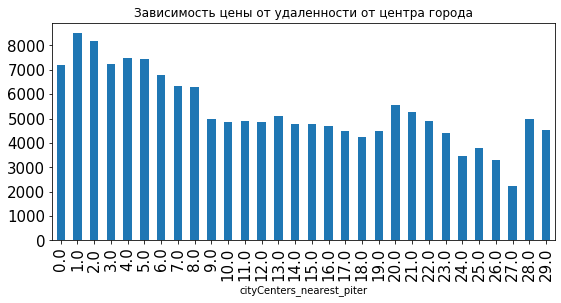

In [127]:
depend_price(propert_piter, 'cityCenters_nearest_piter')

В самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 18 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными.

In [128]:
propert_in_center = propert_piter.query('cityCenters_nearest <= 8000')

In [129]:
print('Квартир в центре Санкт-Петербурга -', propert_in_center.shape[0])

Квартир в центре Санкт-Петербурга - 2357


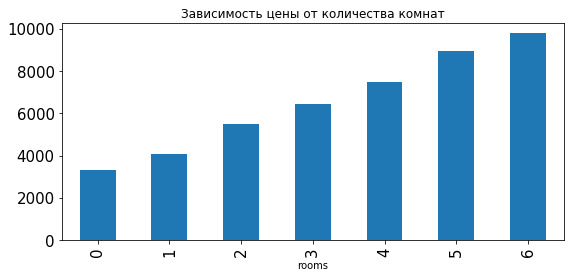

In [130]:
depend_price(propert_piter, 'rooms')

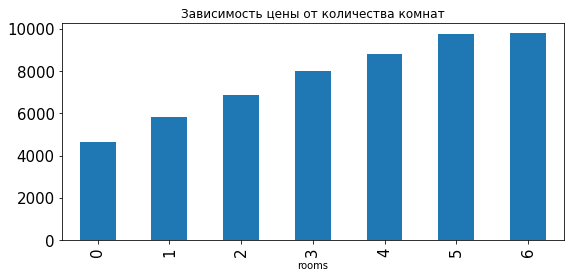

In [131]:
depend_price(propert_in_center, 'rooms')

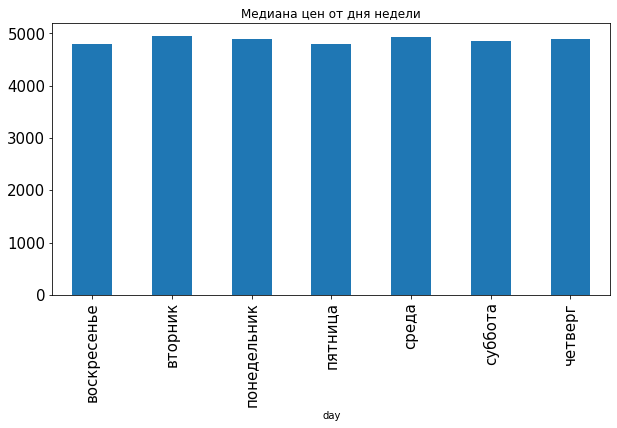

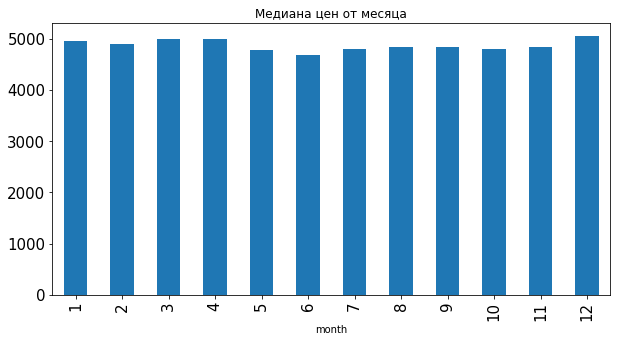

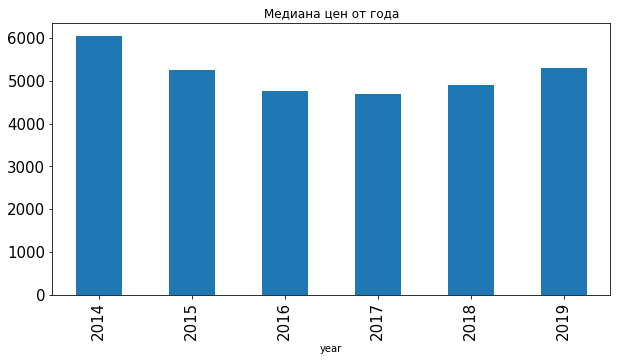

In [132]:
data_price(propert_in_center.query)

#### 6. Сравнение зон продадажи недвижимости

По началу упустил данный параметр в функции, затем его добавил

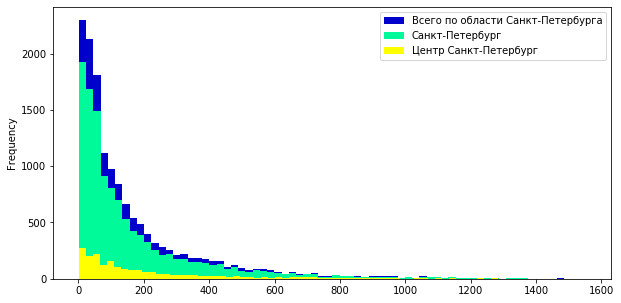

In [133]:
ax = plt.gca()

propert['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumBlue')
propert_piter['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumSpringGreen')
propert_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='Yellow')

plt.legend(['Всего по области Санкт-Петербурга', 'Санкт-Петербург', 'Центр Санкт-Петербург'])

Отбросим хвост и посмотрим ближе данные. Ограничимся 500 днями, а затем 180:

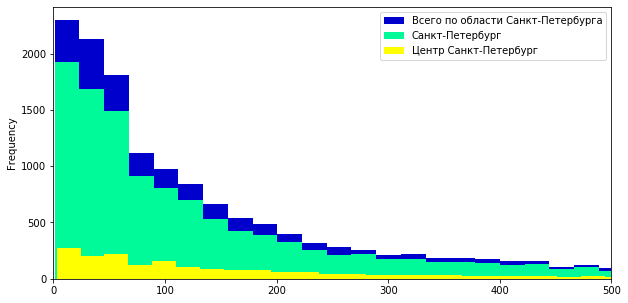

In [134]:
ax = plt.gca()

propert['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumBlue', xlim=(0, 500))
propert_piter['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumSpringGreen', xlim=(0, 500))
propert_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='Yellow', xlim=(0, 500))

plt.legend(['Всего по области Санкт-Петербурга', 'Санкт-Петербург', 'Центр Санкт-Петербург'])

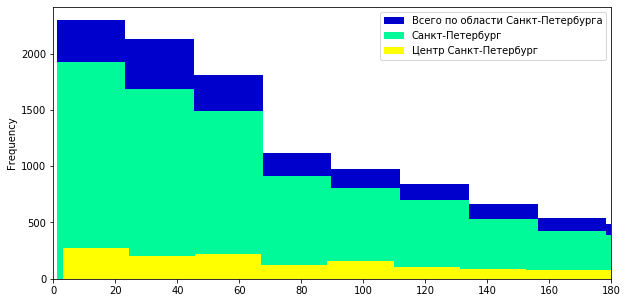

In [135]:
ax = plt.gca()

propert['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumBlue', xlim=(0, 180))
propert_piter['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='MediumSpringGreen', xlim=(0, 180))
propert_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ax=ax, color='Yellow', xlim=(0, 180))

plt.legend(['Всего по области Санкт-Петербурга', 'Санкт-Петербург', 'Центр Санкт-Петербург'])

Обычно вся недвижимость продаются в течение первых 50 дней. Но по Санкт-Петербурга ситуация немного иная - большая часть квартир продается в срок до 70 дней, а центр Петербурга - в первые 25 дней. На общую картину продажи влияет продажи в области (в области недвижимость сильно дешевле). Клиенты просто охотятся за предложением более дешевым и несмотря на их удаленость от города. И в центре так же любят жить многие, поэтому так же есть спрос на данное жилье. 

#### 7. Корреляционный анализ факторов покупки недвижимости

In [136]:
import seaborn as sns

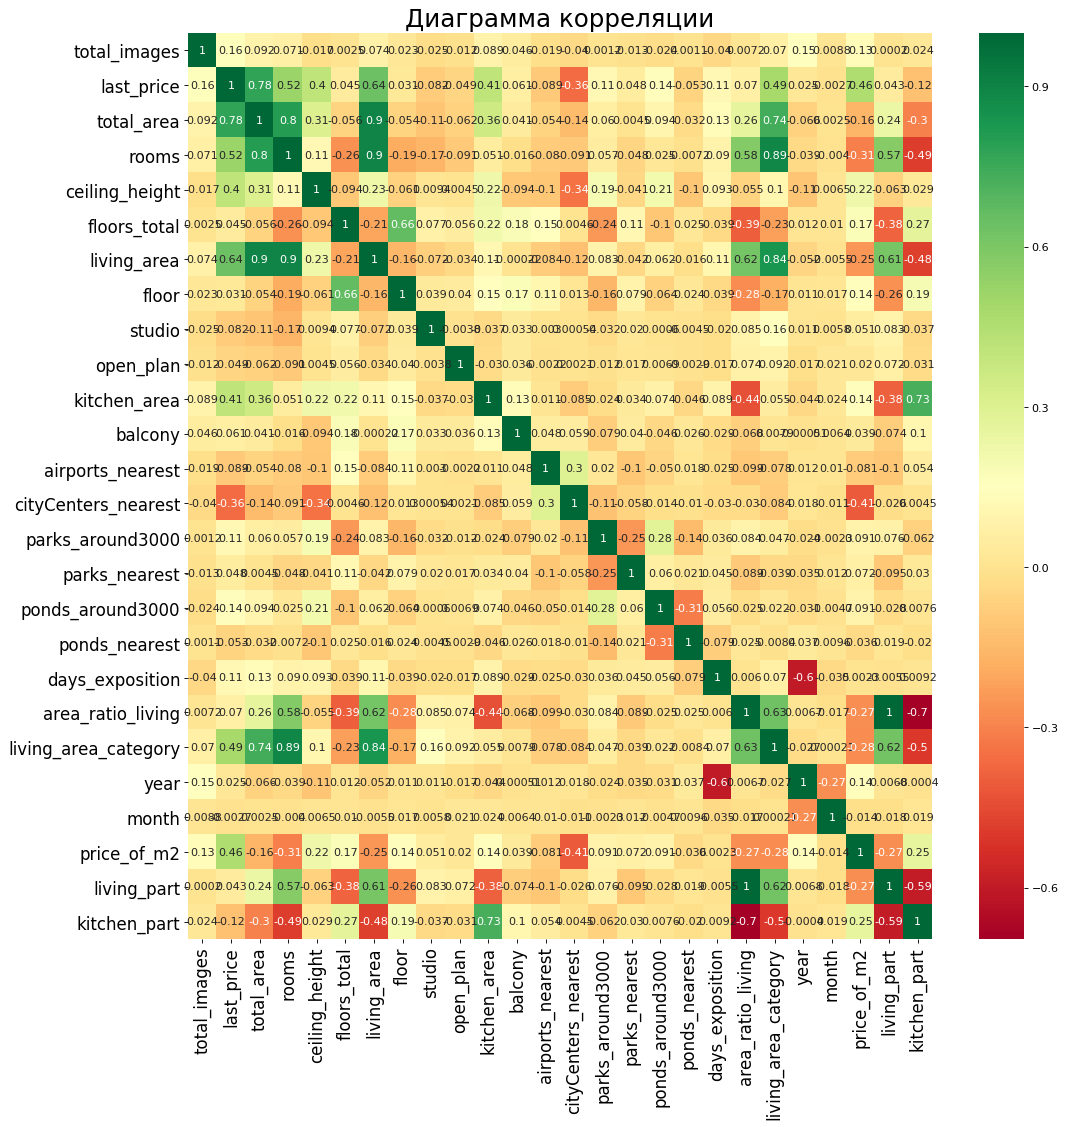

In [137]:
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(propert.corr(), xticklabels=propert.corr().columns, yticklabels=propert.corr().columns, cmap='RdYlGn', annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Диаграмма корреляции используется для визуального просмотра метрики корреляции между всеми возможными парами числовых переменных в данном наборе данных

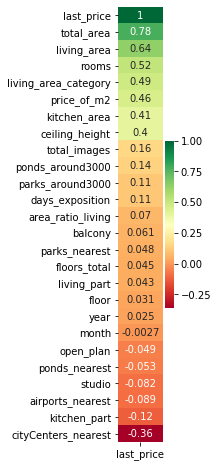

In [138]:
plt.figure(figsize=(1,8))
sns.heatmap(propert.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True)

Из данных выше, видно:
- сильнее всего цена на квартиру зависит от цены за квадратный метр,
- от общей площади квартиры (чем больше площадь, тем выше цена), 
- от площади жилой площади и площади кухни, 
- от количества комнат. 
- небольшое влияние оказывает присутствие парков/водоемов рядом (влияние данного показателя незначительное).
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта.
Многие из этих параметров оказывают довольно слабое влияние.

Диаграмма для центра Санкт-Петербурга

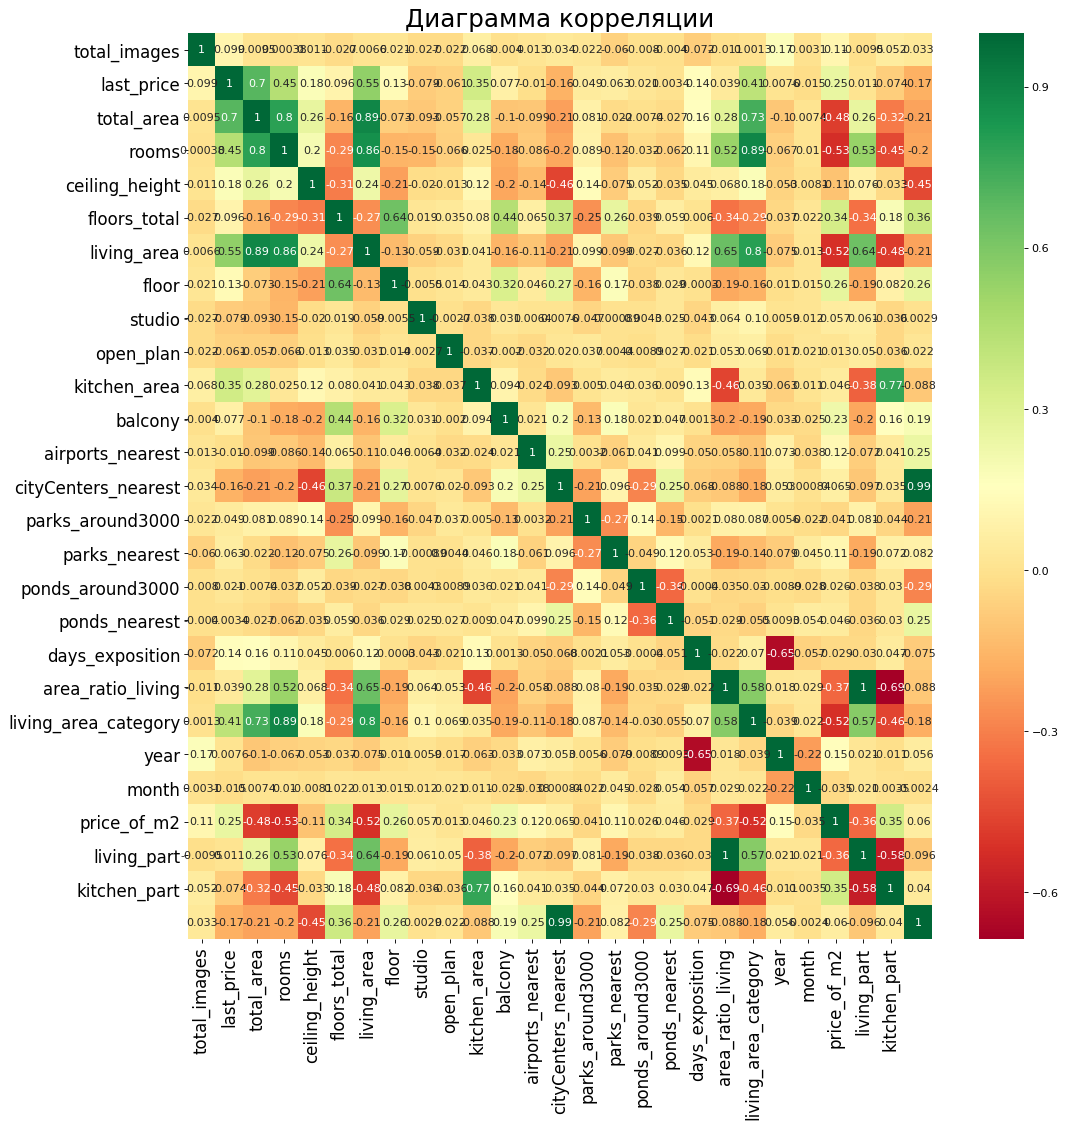

In [139]:
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(propert_in_center.corr(), xticklabels=propert.corr().columns, yticklabels=propert.corr().columns, cmap='RdYlGn', annot=True)

# Decorations
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

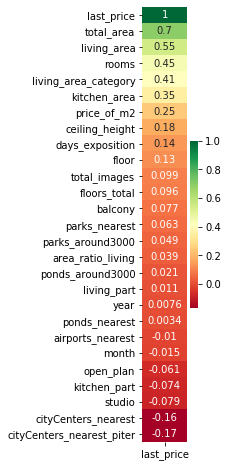

In [140]:
plt.figure(figsize=(1,8))
sns.heatmap(propert_in_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap='RdYlGn', 
            annot=True)

Из данных выше, что цена за квадратный метр не таким оказывается значемым фактором. Большое влияние оказывают факторы пристижности и при этом за частую недвижимость покупается меньшей площадью с меньшим содержанием комнат.

### Шаг 5. Общий вывод

Чем больше площадь недвижимости, тем выше цена. Чем больше цена за квадратный метр, тем выше так же цена. Больше комнат, тем больше цена. Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных. Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные. Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период самых выгодных покупок недвижимости. 2019г. - цены пошли вверх впервые после наступления кризиса.